In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [4]:
def normalEquationRidgeRegression(X, y, alpha):
    one = np.ones(X.shape[0]).reshape([-1, 1])
    X = np.concatenate((one, X), axis = 1)
    XXT = np.matmul(np.transpose(X), X)
    XXTY = np.matmul(np.linalg.inv(XXT+alpha*np.identity(X.shape[1])), np.transpose(X))
    reg = np.matmul(XXTY, y)
    return reg

In [5]:
X = np.array([1, 2, 2, 4, 3, 6, 4, 8]).reshape([4, 2])
y = np.array([2, 3, 4, 5]).reshape([4, 1])

In [6]:
x = np.array([1,2,3,4]).reshape([-1, 1])
Y = np.array([1, 2, 3, 4]).reshape([-1, 1])

In [7]:
normalEquationRidgeRegression(X, y, 0.5)

array([[0.60366714],
       [0.22566996],
       [0.45133992]])

In [8]:
normalEquationRidgeRegression(x, Y, 0.5)

array([[0.13422819],
       [0.93959732]])

In [9]:
def coordinateDescentRegression(X, y):
    
    w = np.zeros(X.shape[1]+1).reshape([-1, 1])
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    
    for j in range(10000):
        for i in range(len(w)):
            w[i] = 0
            error = np.subtract(y,np.matmul(X, w))
            p = np.matmul(X[:, i].T, error)
            z = np.sum(np.square(X[:, i]))
            w[i] = p/z
    return w

In [10]:
clf = coordinateDescentRegression(x, Y)
print(clf)

[[8.04911693e-16]
 [1.00000000e+00]]


In [11]:
def coordinateDescentLasso(X, y, alpha):
    w = np.zeros(X.shape[1]+1).reshape([-1, 1])
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    
    for j in range(10000):
        for i in range(len(w)):
            w[i] = 0
            errors = np.subtract(y,np.matmul(X, w))
            p = np.matmul(X[:, i].T, errors)
            z = np.sum(np.square(X[:, i]))
            if(p < -(alpha**2)/2):
                w[i] = ((p + (alpha**2)/2))/(z)
            elif(p > (alpha**2)/2):
                w[i] = ((p - (alpha**2)/2))/(z)
            else:
                w[i] = 0
    return w

In [12]:
clf = coordinateDescentLasso(x, Y, 0.01)
print(clf)

[[0.        ]
 [0.99999833]]


In [13]:
def sgdRegression(X, y, alpha = 0.1):
    w = np.zeros(X.shape[1]+1).reshape([-1, 1])
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    
    for k in range(10):
        for j in range(X.shape[0]):
            for i in range(len(w)):
                w[i] = w[i] + (((2*alpha*(y[j] - np.matmul(X[j], w))))*X[j, i])
        
    return w

In [14]:
clf = sgdRegression(x, Y, 0.01)
print(clf)

[[0.28839986]
 [0.90966725]]


In [15]:
from autograd import grad

def gradientDescentAutogradLasso(X, y, l, alpha = 0.00001):
    def error(w):
        e = y - np.dot(X, w)
        
        return np.sum(np.square(e))+(l*np.linalg.norm(w, 1))
        
    w = np.zeros(X.shape[1]+1)
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    
    
    for i in range(1000):
        w = w - alpha*grad(error)(w)
        
    print (error(w))
    
    return w

In [16]:
clf = gradientDescentAutogradLasso(x, Y, 0.01)
print(clf)

32.61360246004136
[0.34610904 0.67398656]


In [17]:
X = np.array([1,3,6]).reshape([-1,1])
y = np.array([6, 10, 16]).reshape([-1, 1])
print(X, y)

[[1]
 [3]
 [6]] [[ 6]
 [10]
 [16]]


In [18]:
def sgdRegression(X, y, alpha = 0.1):
    weights = []
    w = np.zeros(X.shape[1]+1).reshape([-1, 1])
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    
    for k in range(50):
        for j in range(X.shape[0]):
            for i in range(len(w)):
                w[i] = w[i] + (((2*alpha*(y[j] - np.matmul(X[j], w))))*X[j, i])
            weights.append(np.copy(w))
    return weights

In [19]:
w = sgdRegression(X, y, 0.01)
# b = np.array([X*w[1]+w[0] for i in w])
# print(b)
li = []
x_ = X.flatten()
for i in range(len(w)):
    li.append({'data':[{'x':x_, 'y':(x_*w[i][1] + w[i][0])}]})


In [472]:

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
from plotly import tools
import plotly.graph_objs as go

init_notebook_mode(connected=True)
a = np.linspace(0, 8, 25)
b = np.array([a*w[1]+w[0] for i in w])
figure = {'data': [{'x': X.flatten(), 'y': y.flatten()}],
          'layout': {'xaxis': {'range': [0, 10], 'autorange': False},
                     'yaxis': {'range': [0, 20], 'autorange': False},
                     'title': 'Gradient Descent',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': li,}

trace1 = go.Scatter(x = X.flatten(), y = y.flatten())
# figure['frames']


iplot(figure)

In [464]:
y

array([[ 6],
       [10],
       [16]])

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

theta0 = np.arange(15,  15, 0.2)
theta1 = np.arange(-15, 15, 0.2)
Z = []
for i in theta0:
    for j in theta1:
        Z.append(np.sum((np.subtract((X*j + i), y)**2)))
data = [
     go.Contour(
        z=Z,
         x = theta0, y = theta1, 
        colorscale='Jet'
    )]
py.iplot(data)

SyntaxError: invalid syntax (<ipython-input-20-b50e0dc4dc47>, line 4)

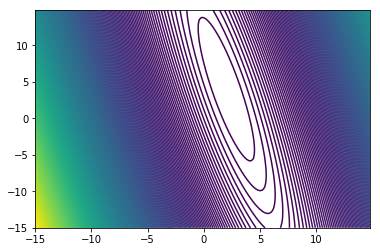

In [470]:
Z = np.array(Z).reshape(x_axis.shape)
x_axis, y_axis = np.meshgrid(theta0, theta1)
plt.contour(x_axis, y_axis, Z, 300)
plt.show()

In [1]:
def coordinateDescentRegression(X, y):
    
    w = np.zeros(X.shape[1]+1).reshape([-1, 1])
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    weights = []
    for j in range(10000):
        for i in range(len(w)):
            w[i] = 0
            error = np.subtract(y,np.matmul(X, w))
            p = np.matmul(X[:, i].T, error)
            z = np.sum(np.square(X[:, i]))
            w[i] = p/z
            weights.append(np.copy(w))
    return weights

In [2]:
w = coordinateDescentRegression(X, y)
# b = np.array([X*w[1]+w[0] for i in w])
# print(b)
li = []
x_ = X.flatten()
for i in range(len(w)):
    li.append({'data':[{'x':x_, 'y':(x_*w[i][1] + w[i][0])}]})


NameError: name 'X' is not defined

In [ ]:

from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML
from plotly import tools
import plotly.graph_objs as go

init_notebook_mode(connected=True)
a = np.linspace(0, 8, 25)
b = np.array([a*w[1]+w[0] for i in w])
figure = {'data': [{'x': X.flatten(), 'y': y.flatten()}],
          'layout': {'xaxis': {'range': [0, 10], 'autorange': False},
                     'yaxis': {'range': [0, 20], 'autorange': False},
                     'title': 'Gradient Descent',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': li,}

trace1 = go.Scatter(x = X.flatten(), y = y.flatten())
# figure['frames']


iplot(figure)